# SF Muni Routes and Stops Data Visualization

This Notebook contains the Visualization of the San Francisco"Muni" Routes and Stops. Data used is from SF Open Data: https://datasf.org/opendata/.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sf-open-data-transportation/Muni_Simple_Routes.csv
/kaggle/input/sf-open-data-transportation/Muni_Stops.csv


In [2]:
import geopandas as gpd
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns
import shapely.wkt
import contextily as ctx

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df_route = pd.read_csv("/kaggle/input/sf-open-data-transportation/Muni_Simple_Routes.csv")

In [4]:
df_route.head()

,PATTERN,PATTERNID,ROUTE_NAME,DIRECTION,PATTERN_TYPE,SUB_TYPE,PATTERN_VERSION,LINEABBR,SIGNID,SERVICE_CA,shape
0,1 O F00,209205,1,O,F,0,0,001,142,Frequent Local,"MULTILINESTRING ((-122.396965 37.795437, -122...."
1,1 I F00,209209,1,I,F,0,0,001,142,Frequent Local,"MULTILINESTRING ((-122.49315 37.77971, -122.49..."
2,12 O F10,209280,12,O,F,1,0,012,142,Grid,"MULTILINESTRING ((-122.42306 37.79394, -122.42..."
3,12 I F10,209283,12,I,F,1,0,012,142,Grid,"MULTILINESTRING ((-122.42028 37.74802, -122.42..."
4,14 I F00,209290,14,I,F,0,0,014,142,Frequent Local,"MULTILINESTRING ((-122.45991 37.70648, -122.45..."


In [5]:
df_route["shape"][0]

'MULTILINESTRING ((-122.396965 37.795437, -122.39781 37.794437, -122.39898 37.79429, -122.40016 37.79414, -122.40133 37.79399, -122.40217 37.793884, -122.40297 37.793785, -122.40403 37.79365, -122.404625 37.79357, -122.40614 37.793385, -122.406654 37.79332, -122.4073 37.79324, -122.40739 37.79323, -122.40774 37.793182, -122.40856 37.79308, -122.40902 37.79302, -122.40937 37.792976, -122.41102 37.792767, -122.41191 37.792652, -122.41194 37.79265, -122.41266 37.792557, -122.41431 37.792347, -122.41488 37.792274, -122.41513 37.79224, -122.41554 37.79219, -122.41595 37.792137, -122.416306 37.79209, -122.417595 37.791927, -122.419235 37.79171, -122.42088 37.7915, -122.42252 37.791294, -122.42417 37.791084, -122.42581 37.79088, -122.42746 37.790672, -122.42911 37.790462, -122.43075 37.790257, -122.432396 37.79005, -122.43361 37.789894, -122.43404 37.78984, -122.435684 37.789635, -122.43559 37.789177, -122.4355 37.7887, -122.43714 37.78849, -122.43879 37.788284, -122.44045 37.78807, -122.4421

In [6]:
df_route.columns

Index(['PATTERN', 'PATTERNID', 'ROUTE_NAME', 'DIRECTION', 'PATTERN_TYPE',
       'SUB_TYPE', 'PATTERN_VERSION', 'LINEABBR', 'SIGNID', 'SERVICE_CA',
       'shape'],
      dtype='object')

In [7]:
gp_df_route = gpd.GeoDataFrame(df_route, geometry = df_route["shape"].apply(shapely.wkt.loads))

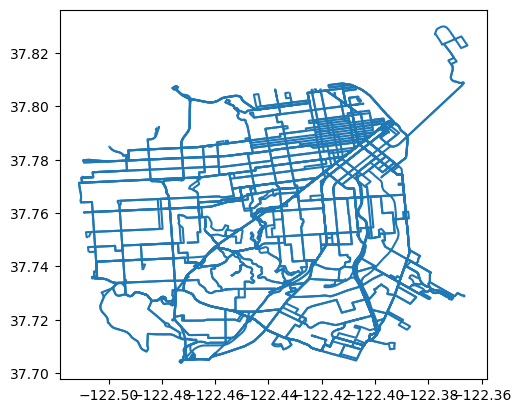

In [8]:
gp_df_route.plot()
plt.show()

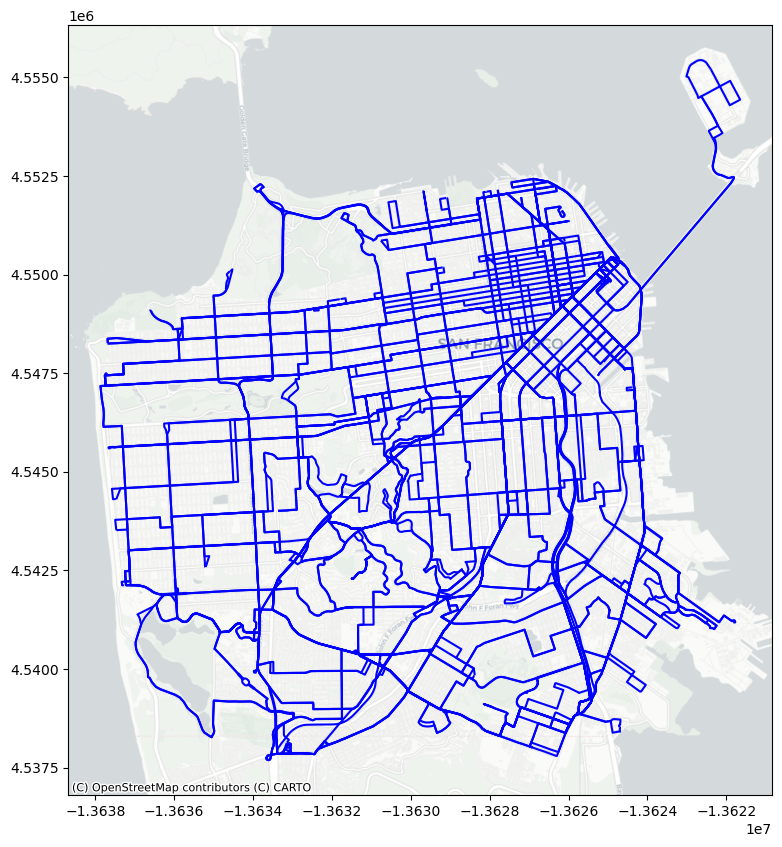

In [9]:
gp_df_route.crs = "EPSG:4326"
gp_df_route = gp_df_route.to_crs(epsg=3857)
ax = gp_df_route.plot(figsize=(10, 10), alpha=1.0, edgecolor='blue')
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
plt.show()

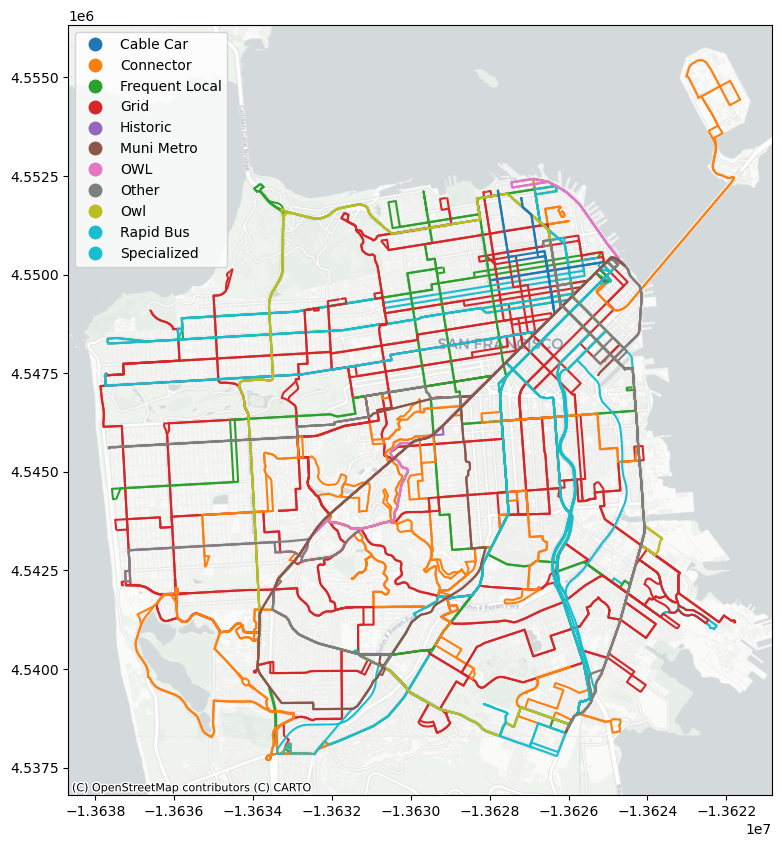

In [10]:
ax = gp_df_route.plot(column = "SERVICE_CA", legend = True, figsize=(10, 10), alpha=1.0,  legend_kwds={'loc': 'upper left'})
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
plt.show()

In [11]:
df_stops = pd.read_csv("/kaggle/input/sf-open-data-transportation/Muni_Stops.csv")

In [12]:
df_stops.head()

,OBJECTID,STOPNAME,TRAPEZESTOPABBR,RUCUSSTOPABBR,STOPID,LATITUDE,LONGITUDE,ACCESSIBILITYMASK,ATSTREET,ONSTREET,...,INSERT_TIMESTAMP,SDE_ID,SIGNUPID,SUPERVISOR_DISTRICT,shape,Neighborhoods,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods
0,45894,Polk St&Lombard St SE-NS/BZ,POLKLOM1,POLKLOMB,5991,37.801476,-122.422796,0.0,LOMBARD ST,POLK ST,...,20230614161206,15066563,142,None,POINT (-122.4228 37.801476),107.0,107.0,4.0,6.0,32.0
1,44230,Chestnut St&Fillmore St NE-NS/BZ,CHESFIL0,CHESFILL,3941,37.800845,-122.436245,0.0,WEBSTER ST,CHESTNUT ST,...,20230614161206,15060818,142,None,POINT (-122.43625 37.800846),17.0,17.0,4.0,6.0,13.0
2,44983,Geary Blvd&Arguello Blvd NE-NS/BZ,GEARARG0,GEARARGL,4287,37.781376,-122.458737,0.0,ARGUELLO BLVD,GEARY BLVD,...,20230614161206,15062159,142,None,POINT (-122.45874 37.781376),11.0,11.0,8.0,6.0,31.0
3,44057,3rd St&Folsom St N-FS/BZ,.3STFOL0,3STFOLS,3124,37.784204,-122.399326,0.0,CLEMENTINA ST,03RD ST,...,20230614161206,15059964,142,None,POINT (-122.39932 37.784203),32.0,32.0,1.0,10.0,8.0
4,45580,Potrero Ave&25th St SE-NS/BZ,POTR25S1,POTR25ST,6040,37.751640,-122.406080,0.0,25TH ST,POTRERO AVE,...,20230614161206,15064776,142,None,POINT (-122.40608 37.75164),54.0,54.0,3.0,9.0,20.0


In [13]:
df_stops.columns

Index(['OBJECTID', 'STOPNAME', 'TRAPEZESTOPABBR', 'RUCUSSTOPABBR', 'STOPID',
       'LATITUDE', 'LONGITUDE', 'ACCESSIBILITYMASK', 'ATSTREET', 'ONSTREET',
       'POSITION', 'ORIENTATION', 'SERVICEPLANNINGSTOPTYPE', 'SHELTER',
       'INSERT_TIMESTAMP', 'SDE_ID', 'SIGNUPID', 'SUPERVISOR_DISTRICT',
       'shape', 'Neighborhoods', 'SF Find Neighborhoods',
       'Current Police Districts', 'Current Supervisor Districts',
       'Analysis Neighborhoods'],
      dtype='object')

In [14]:
gp_df_stops = gpd.GeoDataFrame(df_stops, geometry = df_stops["shape"].apply(shapely.wkt.loads))

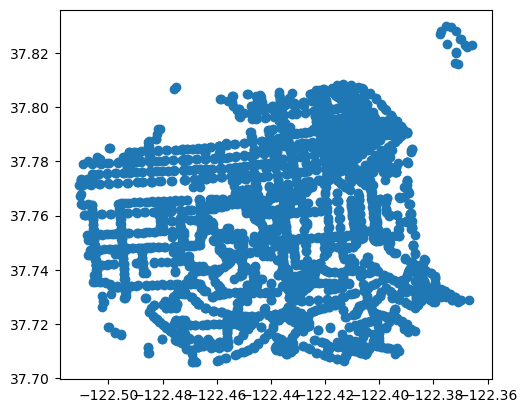

In [15]:
gp_df_stops.plot()
plt.show()

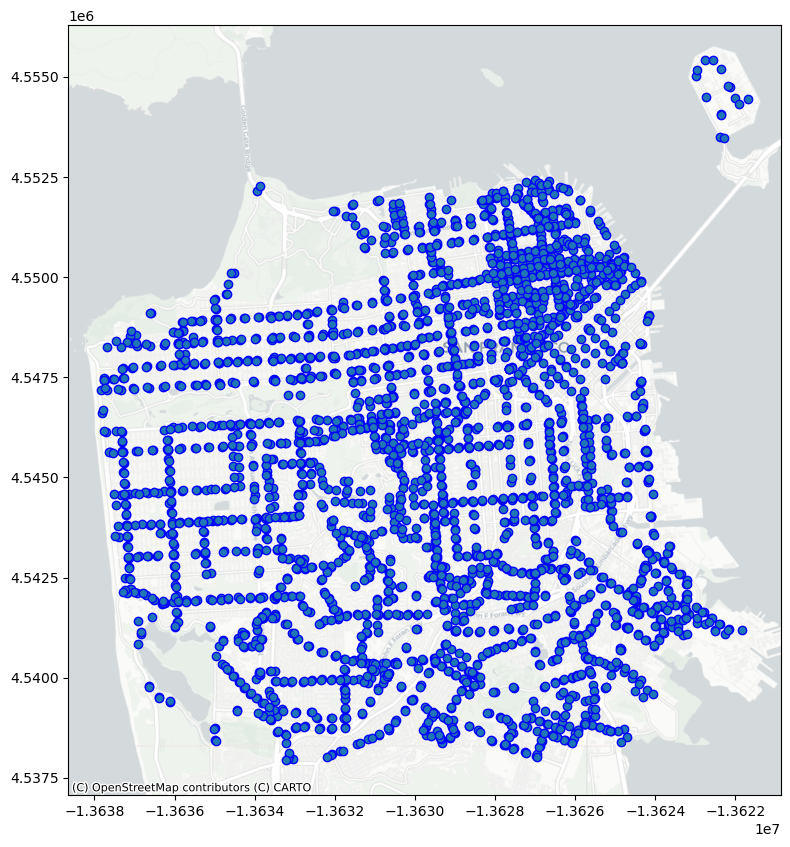

In [16]:
gp_df_stops.crs = "EPSG:4326"
gp_df_stops = gp_df_stops.to_crs(epsg=3857)
ax = gp_df_stops.plot(figsize=(10, 10), alpha=1.0, edgecolor='blue')
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
plt.show()

In [17]:
df_stops["SHELTER"].value_counts()

0.0    2458
1.0     673
Name: SHELTER, dtype: int64

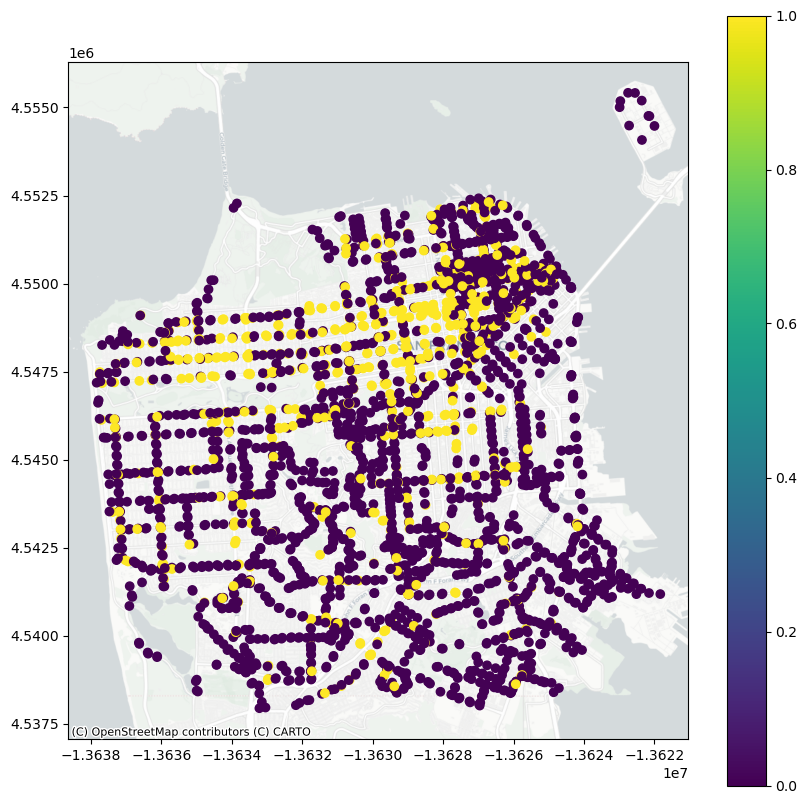

In [18]:
ax = gp_df_stops.plot(column = "SHELTER", figsize=(10, 10), alpha=1.0, legend = True)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
plt.show()